<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Divar_Summer_Camp/blob/main/Divar_summer_camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# df=pd.read_excel('/content/drive/MyDrive/MachineLearing/Untitled Folder/Summer Camp Task Data.xlsx',sheet_name='Summer Camp Task Data')
# df.to_csv (r'/content/drive/MyDrive/MachineLearing/Untitled Folder/Data.csv', index = None, header=True)

In [ ]:
path='/content/drive/MyDrive/MachineLearing/Untitled Folder/Data.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.shape

(111083, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111083 entries, 0 to 111082
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   action                   111083 non-null  object 
 1   created_at               111083 non-null  int64  
 2   source_event_id          111083 non-null  object 
 3   device_id                109596 non-null  object 
 4   post_page_offset         35287 non-null   float64
 5   tokens                   35287 non-null   object 
 6   post_index_in_post_list  75796 non-null   float64
 7   post_token               75795 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.isnull().sum()

action                         0
created_at                     0
source_event_id                0
device_id                   1487
post_page_offset           75796
tokens                     75796
post_index_in_post_list    35287
post_token                 35288
dtype: int64

# Problem 1:

##1st mistake in dataframe:

In [ ]:
df['post_page_offset'][df['action']=='load_post_page'].head()

0    26.0
1    19.0
2     0.0
3     0.0
4     1.0
Name: post_page_offset, dtype: float64

##2nd mistake in dataframe:

In [ ]:
df['device_id'].isnull().sum()

1487

Device id shouldn't be null value. it seems some of them are missed

##3rd mistake in dataframe:

In [ ]:
df[df['action']=='click_post'].isnull().sum()

action                         0
created_at                     0
source_event_id                0
device_id                    978
post_page_offset           75796
tokens                     75796
post_index_in_post_list        0
post_token                     1
dtype: int64

As you see one of the post_token is missed when the action is click

In [ ]:
df['post_token'][df['action']=='click_post'].isnull().sum()

1

##4th mistake in dataframe: 

In [ ]:
mis_4=pd.crosstab(df['source_event_id'],df['action'])
mis_4.head()

action,click_post,load_post_page
source_event_id,,
00049ef3-c027-4f55-869c-46711f0ea0ad,0,1
00069dda-4175-4bb0-8ef0-c0e1031d4da6,0,1
00142c59-745c-4004-a955-698ddcf1faa6,4,0
0016f59f-9fb3-4ab5-ae78-9783314b81fc,10,0
0017b9ef-5903-40f9-a219-85728eb78436,5,0


#Problem 2 part a:

### Solution_1

In [ ]:
df2=df[['source_event_id','tokens']][df['action']=='load_post_page'].copy()

In [ ]:
df2['result_count']=df2['tokens'].apply(lambda x: len((x).split()))

In [ ]:
te=pd.DataFrame({'count' : df2.groupby( [ 'source_event_id'] )['result_count'].sum()}).reset_index()

In [ ]:
total_load_queries=total=te['count'].count()
dark_queries=te['count'][te['count']<10].count()
not_dark_queries=total_load_queries-dark_queries

([<matplotlib.patches.Wedge at 0x7f4851883210>,
 [Text(-1.0210801965437737, 0.4091396243657278, 'not_dark_queries'),
  Text(1.0210801773905644, -0.40913967216594077, 'dark_queries')],
 [Text(-0.5569528344784219, 0.22316706783585152, '87.9%'),
  Text(0.5569528240312169, -0.22316709390869494, '12.1%')])

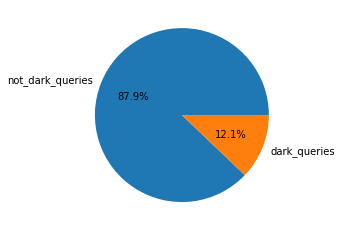

In [ ]:
plt.pie([not_dark_queries,dark_queries],labels=['not_dark_queries','dark_queries'],autopct='%1.1f%%')

In [ ]:
del(df2)

### solution_2

In [ ]:
df2=pd.DataFrame()
df2=df.copy()

In [ ]:
def f(x):
  if x is np.nan:
    return(0)
  else: 
    return(len(x.split()))

In [ ]:
df2['tokens_count']=df2['tokens'].dropna().apply(lambda x: f(x))

In [ ]:
df3=pd.DataFrame()
df3=df2[df2['action']=='load_post_page']
df3.isnull().sum()

action                         0
created_at                     0
source_event_id                0
device_id                    509
post_page_offset               0
tokens                         0
post_index_in_post_list    35287
post_token                 35287
tokens_count                   0
dtype: int64

In [ ]:
j=0
for i in range(len((df3.groupby('source_event_id',as_index=True)['tokens_count'].sum()))):
  if (df3.groupby('source_event_id',as_index=True)['tokens_count'].sum())[i]<10:
    j+=1
print(j)

1138


In [ ]:
y=j
z=len((df3.groupby('source_event_id',as_index=True)['tokens_count'].sum()))-y

In [ ]:
len((df3.groupby('source_event_id',as_index=True)['tokens_count'].sum()))

9381

In [ ]:
z,y

(8179, 1202)

([<matplotlib.patches.Wedge at 0x7f96705ea8d0>,
 [Text(1.0120773233819933, 0.43092863851911756, 'dark_queries'),
  Text(-1.0120773233819933, -0.43092863851911756, 'others')],
 [Text(0.5520421763901782, 0.23505198464679136, '12.8%'),
  Text(-0.5520421763901782, -0.23505198464679136, '87.2%')])

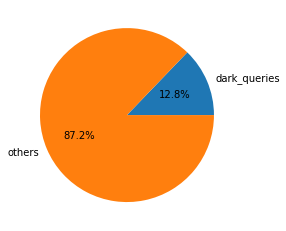

In [ ]:
plt.pie([y,z], autopct='%1.1f%%',labels=['dark_queries','others'])

In [ ]:
del(df3)

#Problem 2 part b:

In [ ]:
df2=pd.DataFrame(pd.crosstab(df['source_event_id'],df['action']))

In [ ]:
bounce_queries=x=df2['click_post'][df2['click_post']==0].count()

In [ ]:
not_bounce_queries=df2['click_post'].count()-df2['click_post'][df2['click_post']==0].count()

([<matplotlib.patches.Wedge at 0x7f484ca161d0>,
 [Text(0.7943867504668422, 0.7608874362760442, 'bounce_queries'),
  Text(-0.794386750466842, -0.7608874362760443, 'not_bounce_queries')],
 [Text(0.4333018638910048, 0.41502951069602406, '24.3%'),
  Text(-0.4333018638910047, -0.4150295106960241, '75.7%')])

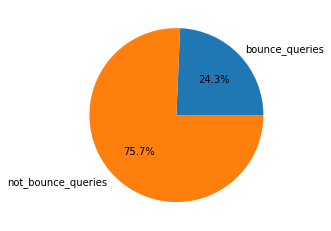

In [ ]:
plt.pie([bounce_queries,not_bounce_queries],labels=['bounce_queries','not_bounce_queries'],autopct='%1.1f%%')

#Problem 3:

# metric 1:

note this data frame is not complete , i mean we have queries which have only "click" action, so the load part is mised. infact it is imposible to have click without load, so the load part of this query is mised.

In [ ]:
df_m1=pd.DataFrame(pd.crosstab(df['source_event_id'],df['action']))

In [ ]:
def f_m1(x,y):
  click_percent=((x)/(x+y))*100
  return(click_percent)

In [ ]:
df_m1['click_percent']=df_m1.apply(lambda x: f_m1(x['click_post'],x['load_post_page']),axis=1)

In [ ]:
df_m1['click_percent'].mean()

58.0285877513876

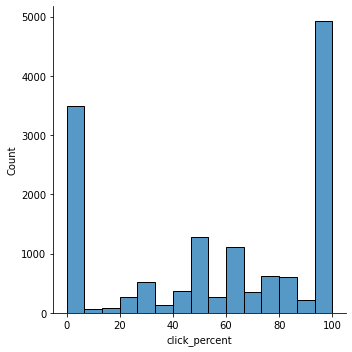

In [ ]:
sns.displot(df_m1['click_percent'])

It is becouse the data frame is not complete, so can ignor the 100 percent part of datas, (queries with only click action and no load action) 
even with that assumption, this isnt a sharp distribution around the mean value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


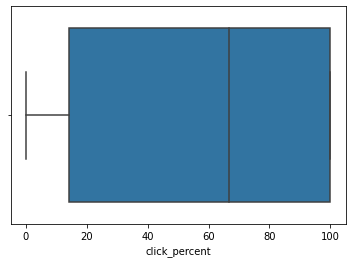

In [ ]:
sns.boxplot(df_m1['click_percent'])

####َAtachment:

we first drop anly_click_queries, and then we repeat the calculations:

In [ ]:
df_m1=pd.DataFrame(pd.crosstab(df['source_event_id'],df['action']))

In [ ]:
def f_m1(x,y):
  click_percent=((x)/(x+y))*100
  return(click_percent)

In [ ]:
df_m1['click_percent']=df_m1.apply(lambda x: f_m1(x['click_post'],x['load_post_page']),axis=1)

In [ ]:
df_m1b=df_m1[df_m1['click_percent']<100]

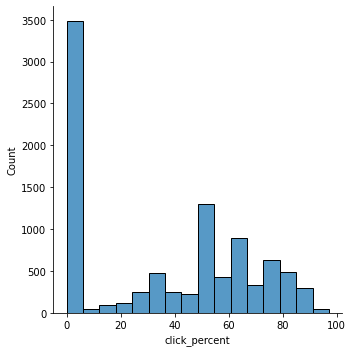

In [ ]:
sns.displot(df_m1b['click_percent'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


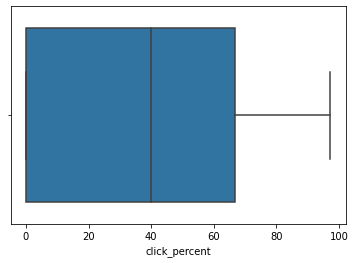

In [ ]:
sns.boxplot(df_m1b['click_percent'])

In [ ]:
df_m1b['click_percent'].mean()

36.038449045287194

In [ ]:
np.std(df_m1b['click_percent'])

31.485314852273692

##metric 2:

In [ ]:
df3=df[df['action']=='click_post'].copy()

In [ ]:
df3.drop(['action','created_at','device_id','post_page_offset','tokens','post_token'], axis=1, inplace=True)

In [ ]:
df3.groupby('source_event_id').min().mean()

post_index_in_post_list    25.201571
dtype: float64

In [ ]:
np.std(df3.groupby('source_event_id').min())

post_index_in_post_list    105.116495
dtype: float64

In [ ]:
m_2=pd.DataFrame(df3.groupby('source_event_id').min())

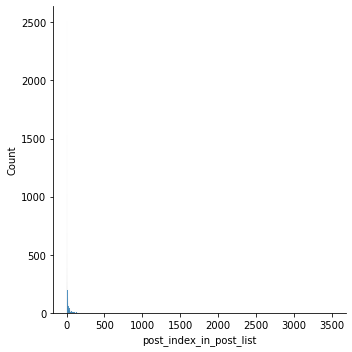

In [ ]:
sns.displot(m_2['post_index_in_post_list'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


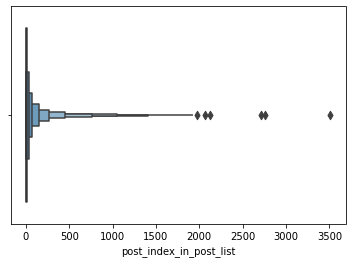

In [ ]:
sns.boxenplot(m_2['post_index_in_post_list'])

It is not a good metric unless we drop very high values. and still it doesnt have a sharp distribution

## metric 3:

we use some of the calculations of privious metric:

In [ ]:
m_3=pd.DataFrame(df3.groupby('source_event_id').mean())

In [ ]:
m_3['post_index_in_post_list'].mean()

54.969111508628636

In [ ]:
np.std(m_3['post_index_in_post_list'])

141.38599977438204

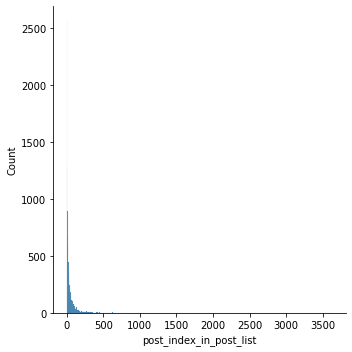

In [ ]:
sns.displot(m_3['post_index_in_post_list'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


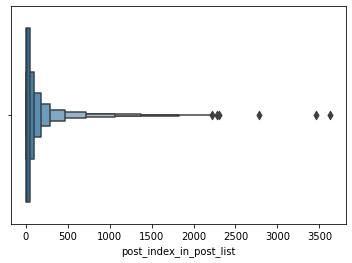

In [ ]:
sns.boxenplot(m_3['post_index_in_post_list'])

 still s not very sharp around mean value

## metric 4:

In [ ]:
test=pd.DataFrame(pd.crosstab(df3['source_event_id'],df['post_index_in_post_list']))

In [ ]:
m_4=pd.DataFrame(test[[1,2,3]].copy())

In [ ]:
del(test)

In [ ]:
def f_m4(x,y,z):
  if(x+y+z)!=0:
    return(1)
  else:
    return(0)

In [ ]:
m_4['metric_4']=m_4.apply(lambda x: f_m4(x[1],x[2],x[3]),axis=1)

In [ ]:
m_4['metric_4'].mean()

0.4678373382624769

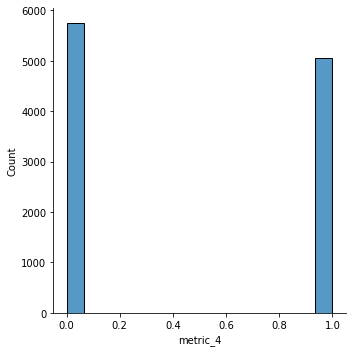

In [ ]:
sns.displot(m_4['metric_4'])

([<matplotlib.patches.Wedge at 0x7f9654370250>,
 [Text(0.1109571681395851, 1.0943895589955361, 'queres with click in first 3 result'),
  Text(-0.11095716813958498, -1.0943895589955361, 'others')],
 [Text(0.06052209171250096, 0.5969397594521105, '46.8%'),
  Text(-0.06052209171250089, -0.5969397594521105, '53.2%')])

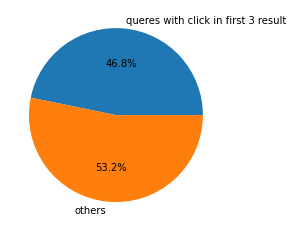

In [ ]:
x=len(m_4[m_4['metric_4']==1])
y=len(m_4[m_4['metric_4']==0])
plt.pie([x,y],labels=['queres with click in first 3 result','others'],autopct='%1.1f%%')

this metric shows the "queries with good results", but it gives no other information, for example how bad results are distributed.